In [1]:
import pandas as pd
import numpy as np
from keras.utils.np_utils import to_categorical
from keras import models
from keras import layers
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text, plot_tree
from keras import losses
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier

# Data EDA

In [2]:
general_data = pd.read_csv('general_data.csv')
employee_survey_data = pd.read_csv('employee_survey_data.csv')
manager_survey_data = pd.read_csv('manager_survey_data.csv')

In [3]:
data = pd.merge(general_data, manager_survey_data, on = 'EmployeeID')
data = pd.merge(data, employee_survey_data, on = 'EmployeeID')
data = data.dropna()  # Simply dropping nan
data = data.drop(['EmployeeID','EmployeeCount'],axis = 1).reset_index(drop=True)
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,1.0,6,1,0,0,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,6.0,3,5,1,4,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,5.0,2,5,0,3,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,13.0,5,8,7,5,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,9.0,2,6,0,4,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4295,29,No,Travel_Rarely,Sales,4,3,Other,Female,2,Human Resources,...,6.0,2,6,1,5,2,3,3.0,4.0,3.0
4296,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,10.0,5,3,0,2,3,3,4.0,1.0,3.0
4297,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,10.0,2,3,0,2,2,3,4.0,4.0,3.0
4298,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,5.0,4,4,1,2,3,4,1.0,3.0,3.0


Totally 4300 recoreds are presented and *Attrtion* being dependent categorical variable, other 26 independent variables are used for prediction.  

## 1. Basic type of variables

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4300 entries, 0 to 4299
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   Gender                   4300 non-null   object 
 8   JobLevel                 4300 non-null   int64  
 9   JobRole                  4300 non-null   object 
 10  MaritalStatus            4300 non-null   object 
 11  MonthlyIncome            4300 non-null   int64  
 12  NumCompaniesWorked       4300 non-null   float64
 13  Over18                   4300 non-null   object 
 14  PercentSalaryHike       

In [6]:

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
from scipy import stats
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import pandas as pd
import math
import seaborn as sns
from datetime import datetime
import colorama
from colorama import Fore, Style
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_colwidth', -1)

In order to depict the features of these variables more precisely, some categorical variables stored in numerical formats are converted to string and *Over18* and *StandardHours* which only have 1 unique value are deleted.

## 2. Histograms of variables

Attribute Number: 24


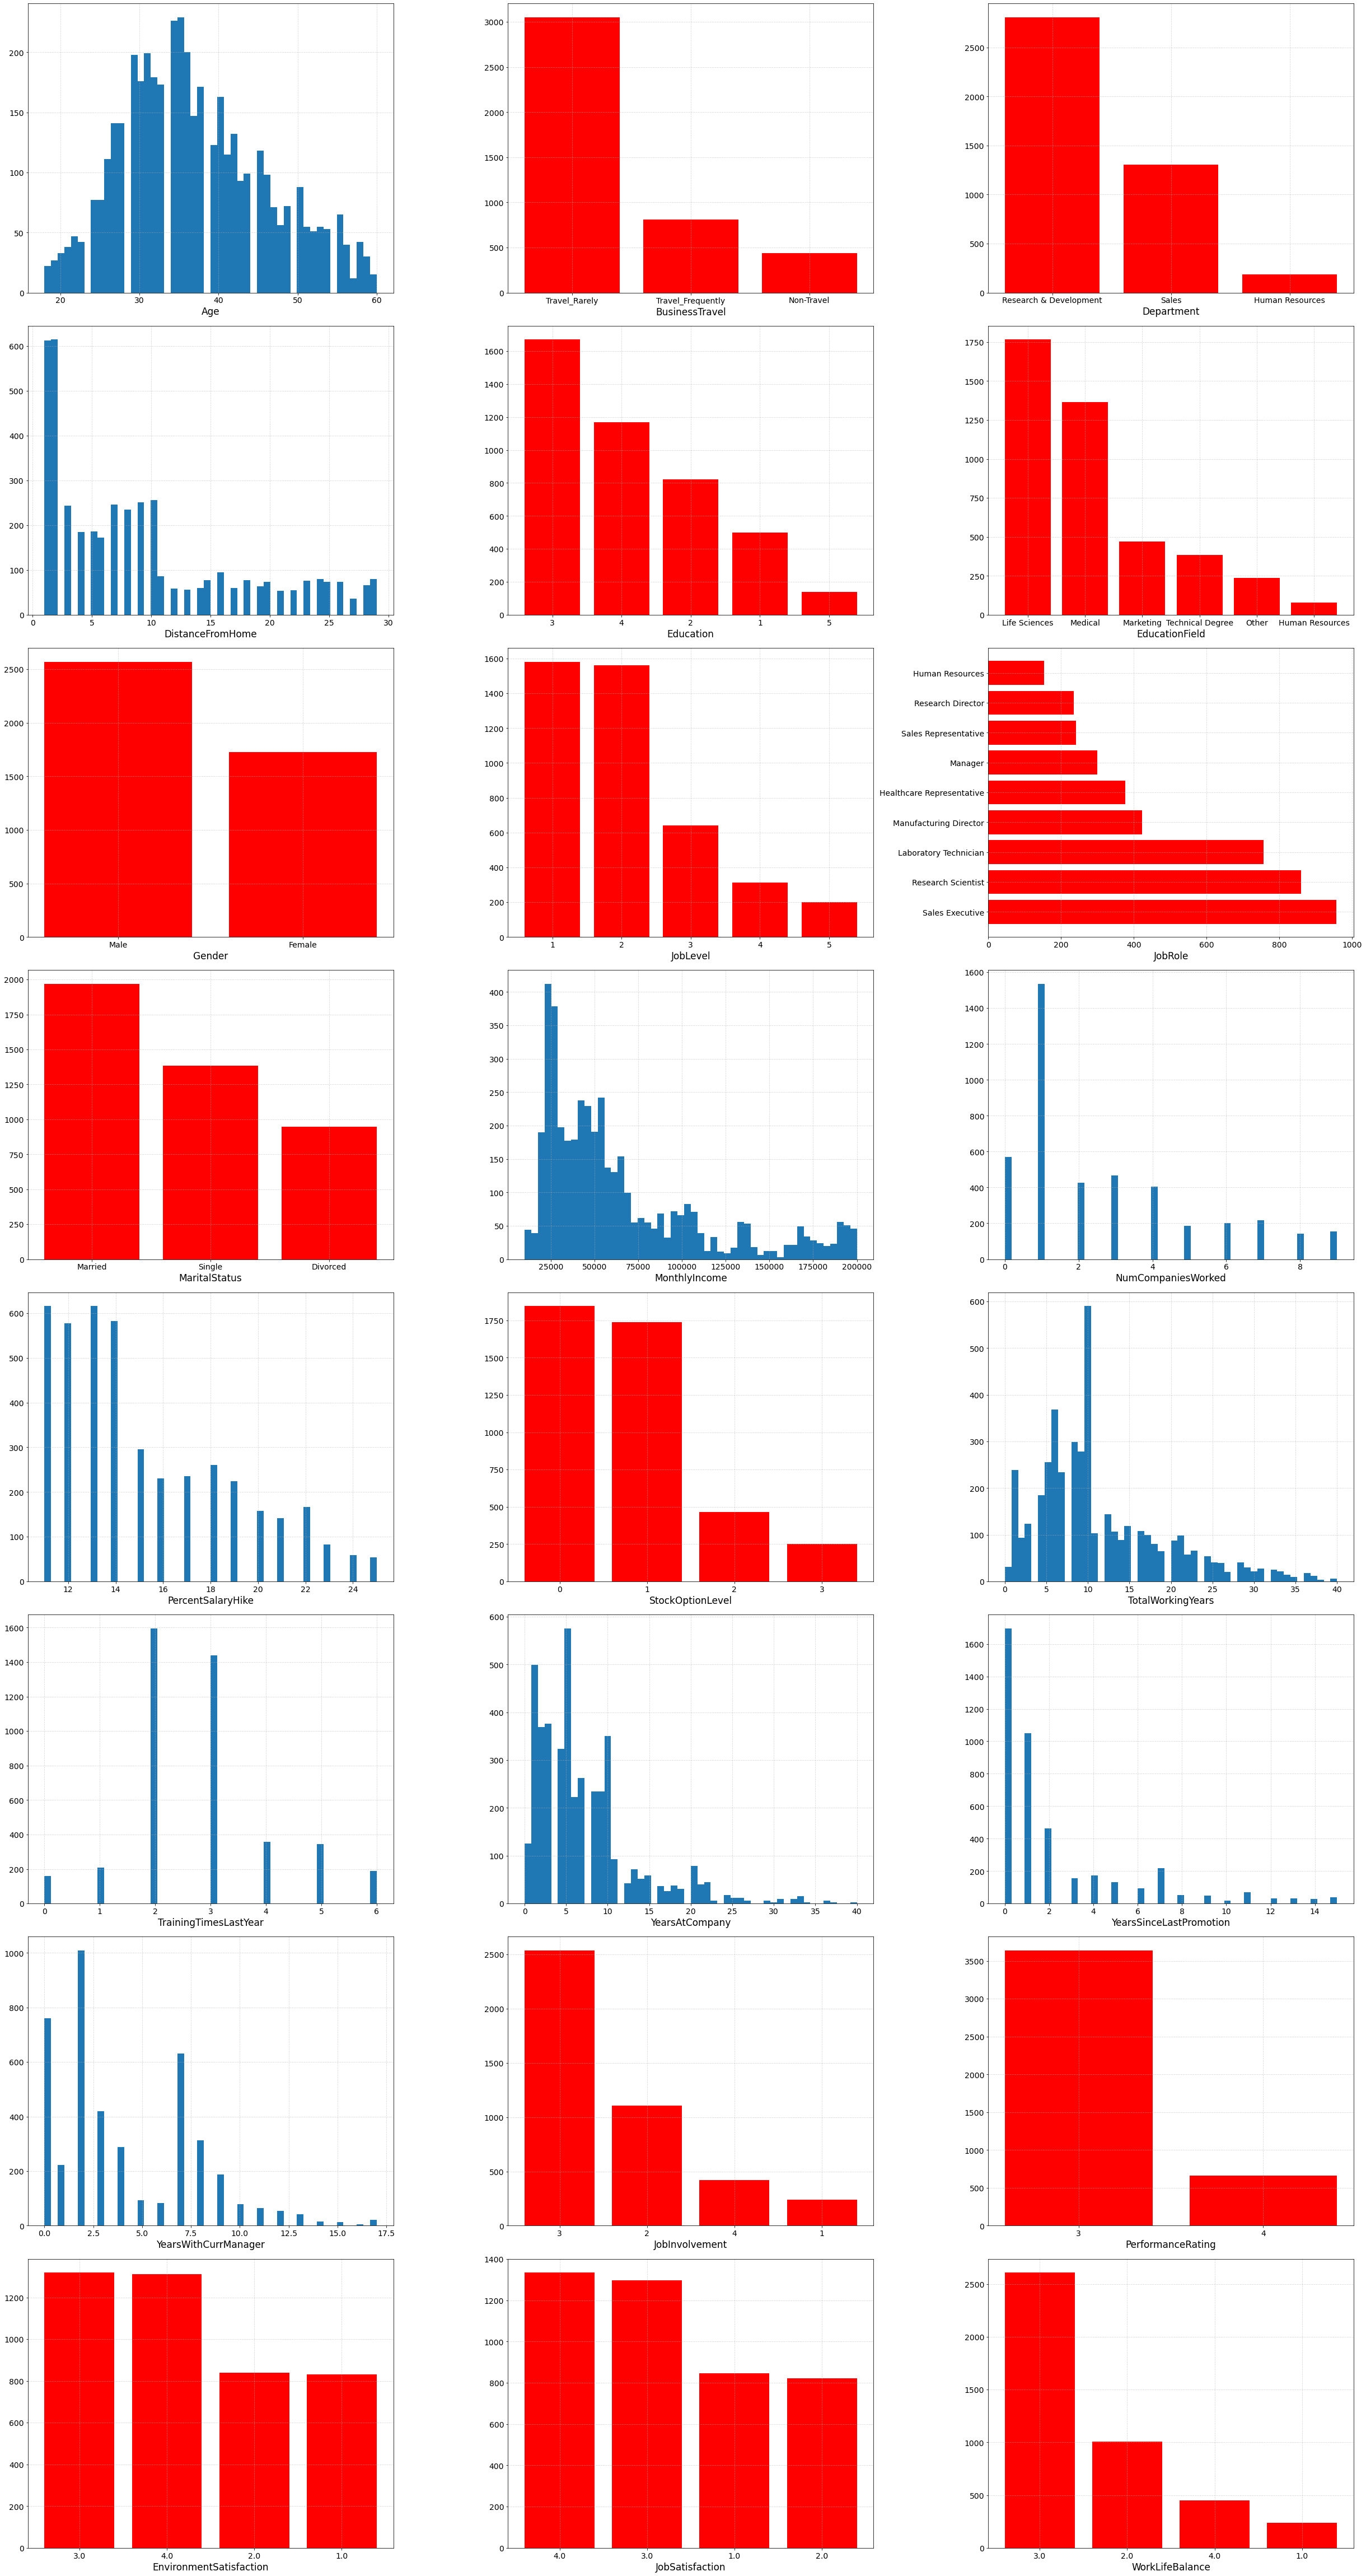

In [7]:
data_=data.copy()
data_=data_.astype({'Education':"str",'StockOptionLevel':"str","JobLevel":"str",'WorkLifeBalance':"str",
                    "JobInvolvement":"str","PerformanceRating":"str","EnvironmentSatisfaction":"str",
                   "JobSatisfaction":"str","StandardHours":"str"})

# data_=data_.astype({'Education':"category",'StockOptionLevel':"category","JobLevel":"category",
#                     "JobInvolvement":"category","PerformanceRating":"category","EnvironmentSatisfaction":"category",
#                    "JobSatisfaction":"category","StandardHours":"category"})
del data_['Attrition']
del data_['Over18']
del data_['StandardHours']
attribute_number = len(data_.columns)
print("Attribute Number: {}".format(attribute_number))
# subplots 
fig = plt.figure(figsize=(34, 64))
ax = fig.subplots(attribute_number//3,3)
# iterations
for num, title in enumerate(data_.columns):
    idx = num//3 # divided with no remainder
    idy = num%3 # remainder 
    if data_[title].dtype in ['object','category']:
        value_count_dict = data_[title].value_counts().to_dict()
        keys = list(value_count_dict.keys())
        values = list(value_count_dict.values())
        if len(data_[title].unique().tolist()) < 8:
            ax[idx, idy].bar(keys, values, color='r')
        else:
            ax[idx, idy].barh(keys, values, color='r')
    else:

        ax[idx, idy].hist(data_[title].values, bins=50);
 
    # set title with attribute
    ax[idx, idy].set_xlabel(title, fontsize=17)
    # set grid width
    ax[idx, idy].grid(linestyle='--', alpha=0.5)
    # font size of ticks
    ax[idx, idy].tick_params(labelsize=14)
plt.tight_layout()


We can see that all numerical variables show right skewness and can be modeled as exponential distribution, except for age which seems to comply with uniform distribution with around 37 as mean.  
For each categorical variables, the distinctions between different bars are prominent, too.

<AxesSubplot:>

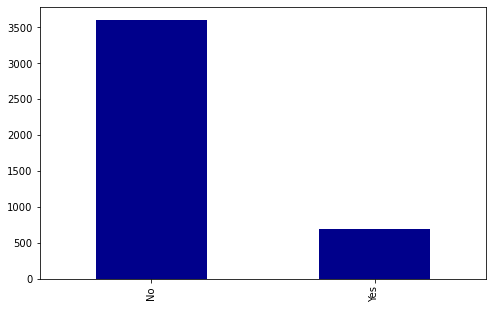

In [8]:
data['Attrition'].value_counts().plot(kind='bar',figsize=(8,5),color="DarkBlue")

For dependent variable, people who choose to leave accounts for near 1/8 of all the employees.

## 3. Stats of numerical variables

In [9]:
data_.describe()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,36.926977,9.197907,65059.844186,2.690000,15.210698,11.285116,2.796279,7.026047,2.190000,4.132558
std,9.146517,8.097059,47045.398914,2.495764,3.662777,7.790052,1.290142,6.148036,3.230818,3.565831
min,18.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,29260.000000,1.000000,12.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,49360.000000,2.000000,14.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,83802.500000,4.000000,18.000000,15.000000,3.000000,9.250000,3.000000,7.000000
max,60.000000,29.000000,199990.000000,9.000000,25.000000,40.000000,6.000000,40.000000,15.000000,17.000000


## 4. Correlation Analysis

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.004621,-0.047256,0.303709,-0.034313,0.681213,-0.032032,0.314384,0.216554,0.204117
DistanceFromHome,0.004621,1.000000,-0.019798,-0.016336,0.035857,0.004364,-0.006383,0.030998,0.001888,0.020876
MonthlyIncome,-0.047256,-0.019798,1.000000,-0.020110,0.008684,-0.029776,0.044378,0.001878,0.063361,0.025514
NumCompaniesWorked,0.303709,-0.016336,-0.020110,1.000000,0.030201,0.240077,-0.030093,-0.115143,-0.033514,-0.107591
PercentSalaryHike,-0.034313,0.035857,0.008684,0.030201,1.000000,-0.021199,-0.035020,-0.027679,-0.028367,-0.039807
TotalWorkingYears,0.681213,0.004364,-0.029776,0.240077,-0.021199,1.000000,-0.041759,0.633194,0.407077,0.463369
TrainingTimesLastYear,-0.032032,-0.006383,0.044378,-0.030093,-0.035020,-0.041759,1.000000,-0.010299,0.013697,-0.015719
YearsAtCompany,0.314384,0.030998,0.001878,-0.115143,-0.027679,0.633194,-0.010299,1.000000,0.619342,0.768700
YearsSinceLastPromotion,0.216554,0.001888,0.063361,-0.033514,-0.028367,0.407077,0.013697,0.619342,1.000000,0.510081
YearsWithCurrManager,0.204117,0.020876,0.025514,-0.107591,-0.039807,0.463369,-0.015719,0.768700,0.510081,1.000000


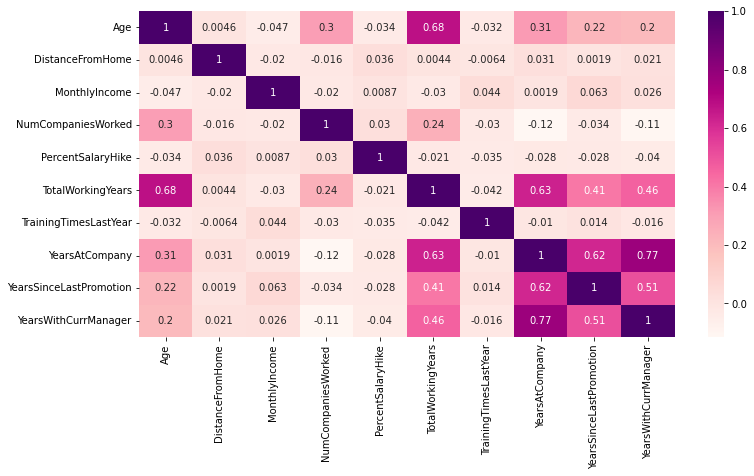

In [10]:
#corr for numerical data
plt.figure(figsize=(12,6))
c= data_.corr()
sns.heatmap(c,cmap="RdPu",annot=True)
c

From the plot above we can see Age is highly correlated with Totalworkingyears; Totalworkingyears is highly correlated with YearsAtCompany; YearsAtCompany is highly correlated with YearsWithCurrManager.  
YearsSinceLastPromotion is mildly correlated with YearsWithCurrManager; Totalworkingyears is mildly correlated with YearsWithCurrManager; Totalworkingyears is mildly correlated with YearsSinceLastPromotion.  
Age is slightly correlated with NumCompaniesWorked; Age is slightly correlated with YearsAtCompany.

## 5. Bivariate Analysis

In [11]:
data_=pd.concat((data_,data['Attrition']),axis=1)

In [12]:
numer_cols=[x for x in data_.columns if data_[x].dtype==np.dtype('int64') or data_[x].dtype==np.dtype('float64')] #Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked

In [13]:
cls_cols=[x for x in data_.columns if x not in numer_cols] 

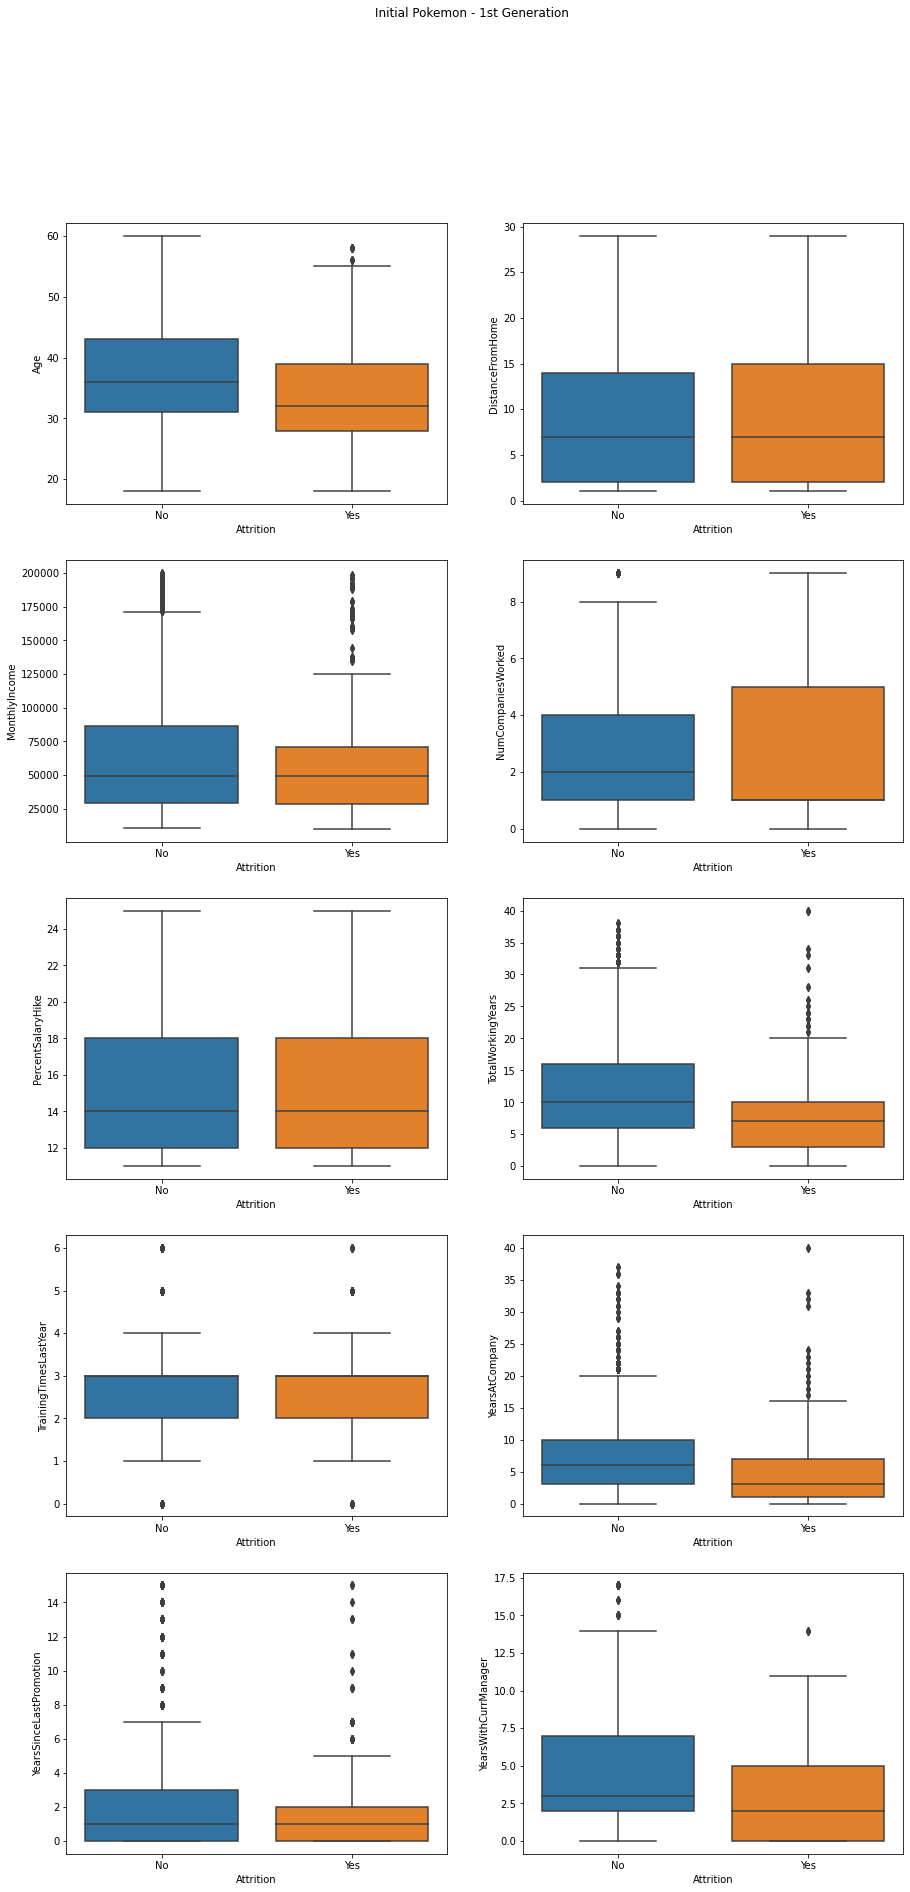

In [14]:
#bivariate
fig, axes = plt.subplots(5,2, figsize=(15, 30), sharey=False)
fig.suptitle('Numerical Variables vs. Attrition')
num=len(numer_cols)
for num,title in enumerate(numer_cols):
    sns.boxplot(ax=axes[num//2,num%2],x='Attrition', y=title, data=data)
#     axes[num//3,num%3].set(title='Comparison of Price Between Categories',xlabel='', ylabel='Price ($)')


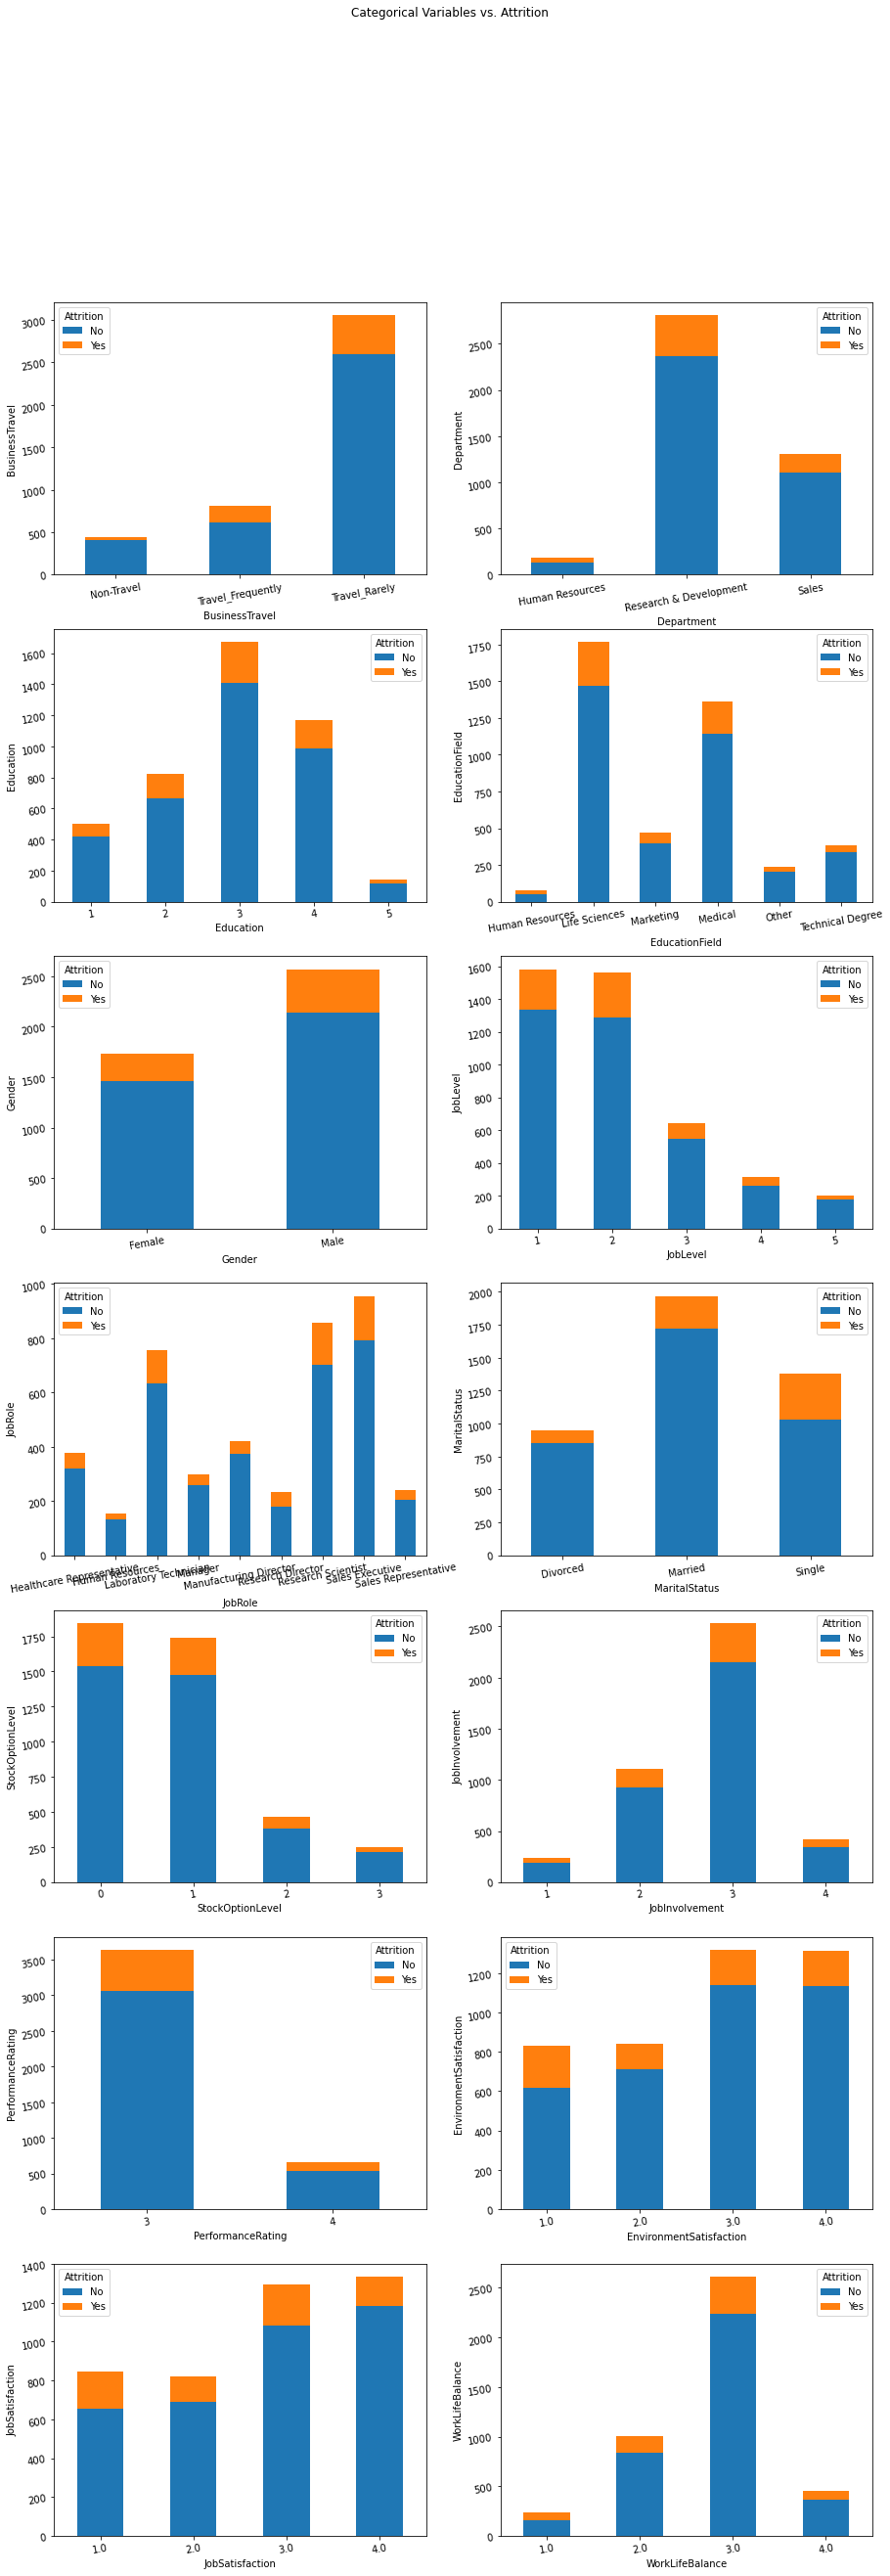

In [43]:
fig, axes = plt.subplots(7,2, figsize=(15, 42), sharey=False)
fig.suptitle('Categorical Variables vs. Attrition')
for num,title in enumerate(cls_cols[:-1]):
    s=data_.groupby(by=[title,"Attrition"]).agg({"Attrition":"count"}).Attrition
    g=s.unstack().plot(ax=axes[num//2,num%2],kind='bar', stacked=True,ylabel=title)
    g.tick_params(rotation=10)

In [51]:
def perc(df):
    return df['Attrition']/df['Attrition'].sum()

In [74]:
for num,title in enumerate(cls_cols[:-1]):
    print(data_.groupby(by=[title])['Attrition'].apply(lambda x: x.value_counts(normalize=True)))

BusinessTravel        
Non-Travel         No     0.918182
                   Yes    0.081818
Travel_Frequently  No     0.754017
                   Yes    0.245983
Travel_Rarely      No     0.849230
                   Yes    0.150770
Name: Attrition, dtype: float64
Department                 
Human Resources         No     0.709677
                        Yes    0.290323
Research & Development  No     0.842180
                        Yes    0.157820
Sales                   No     0.848508
                        Yes    0.151492
Name: Attrition, dtype: float64
Education     
1          No     0.845691
           Yes    0.154309
2          No     0.811665
           Yes    0.188335
3          No     0.844910
           Yes    0.155090
4          No     0.842466
           Yes    0.157534
5          No     0.857143
           Yes    0.142857
Name: Attrition, dtype: float64
EducationField       
Human Resources   No     0.600000
                  Yes    0.400000
Life Sciences     No     0.8

For people who prone to leave, they travel frequently;or work in the Department of Human Resources; or went to college education and have Human Resources education field.
Males are more likely to leave compared to females; single persons seem to leave often;
People whose job level at 2 or 4 are more likely to leave.  
People whose job role as Research Director are more likely to leave.
People with very high ob involvements, or with high performance rating prone to choose to leave.
People with lowest  Environment Satisfaction, Job Satisfaction as well as least WorkLifeBalance tend to leave.       